In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_analytics_lib as dal

# Exercise 1

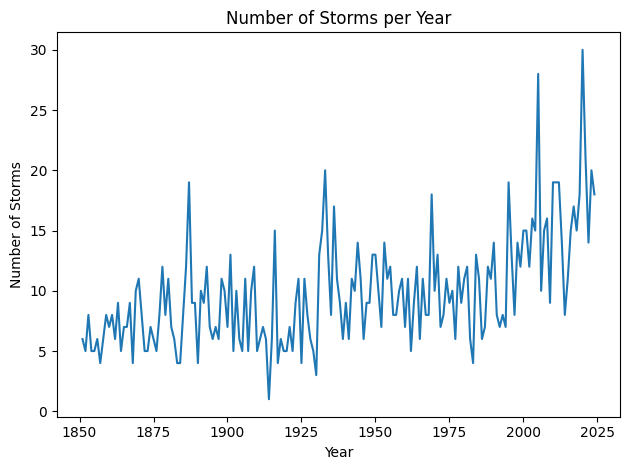

In [2]:
# Reading hurricane_data.txt data

def read_hurricane_data(file_path):
    
    year = []
    storms = []
    hurricanes = []
    major_hurricanes = []
    
    with open(file_path, 'r') as file:
        data = file.readlines()
    
        for line in data[1:]:  # Skip header line
            lines = line.split()
            year.append(int(lines[0]))
            storms.append(int(lines[1]))
            hurricanes.append(int(lines[2]))
            major_hurricanes.append(int(lines[3]))
        
    return year, storms, hurricanes, major_hurricanes


# Reading noaa-sea-surface-temp.csv data for year and temp anomaly

def read_sea_surface_temp(filename):     
    
    csvfile = filename
    df = pd.read_csv(csvfile, skiprows=6)
    
    year = df['Year'].tolist()
    temp_anomaly = df['Annual anomaly'].tolist()
    
    return year, temp_anomaly

# Plotting data
def plot_data(x, y, x_label, y_label, title):
    
    plt.plot(x, y)
    
    plt.xlabel(x_label)
    
    plt.ylabel(y_label)
    
    plt.title(title)
    
    plt.tight_layout()
    
hurricane_year, storms, hurricanes, major_hurricanes = read_hurricane_data('/Users/244213/Desktop/DataAnalytics/Stats/hurricane_data.txt')
noaa_year, temp_anomaly = read_sea_surface_temp('/Users/244213/Desktop/DataAnalytics/Stats/noaa-sea-surface-temp.csv')

plot_data(hurricane_year, storms, 'Year', 'Number of Storms', 'Number of Storms per Year')

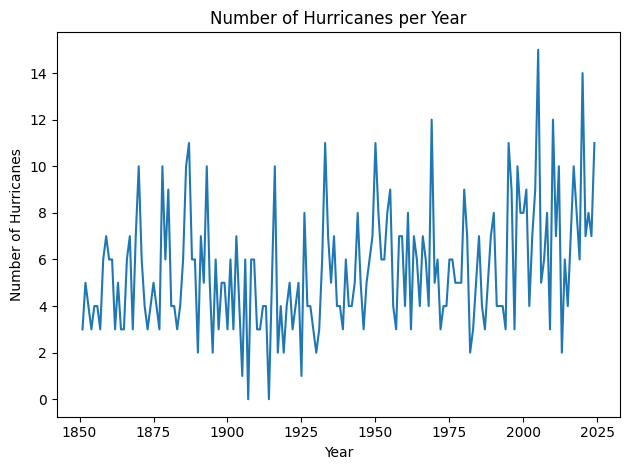

In [3]:
plot_data(hurricane_year, hurricanes, 'Year', 'Number of Hurricanes', 'Number of Hurricanes per Year')

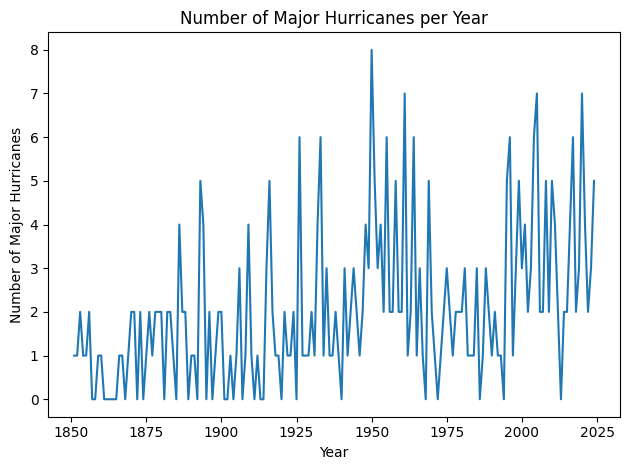

In [4]:
plot_data(hurricane_year, major_hurricanes, 'Year', 'Number of Major Hurricanes', 'Number of Major Hurricanes per Year')

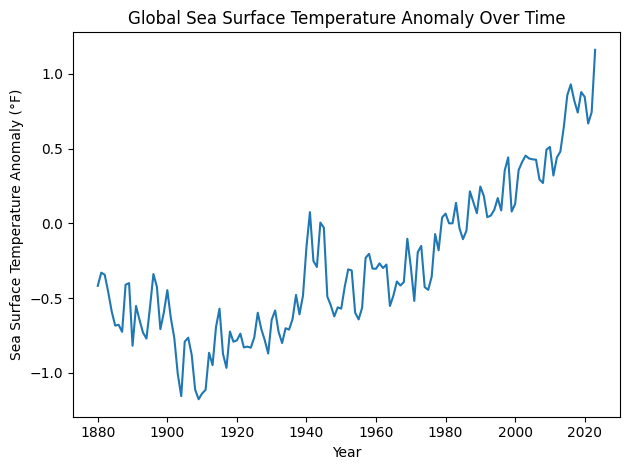

In [5]:
plot_data(noaa_year, temp_anomaly, 'Year', 'Sea Surface Temperature Anomaly (°F)', 'Global Sea Surface Temperature Anomaly Over Time')

# Exercise 2

In [6]:
def weighted_moving_average_filter_for_graphs(x_data, y_data, weight_list):
    x = x_data
    y = y_data
    n = len(weight_list)
    filter_length = n
    
    filtered_data_x = []
    filtered_data_y = []
    
    weight_sum = sum(weight_list)
    
    for i in range(len(x) - filter_length + 1):
        
        numerator_x = 0
        
        for a in range(filter_length):
            
            numerator_x += x_data[i + a] * weight_list[a]
            
        filtered_value_x = numerator_x / weight_sum
        filtered_data_x.append(filtered_value_x)
        
    for i in range(len(y) - filter_length + 1):
        
        numerator_y = 0
        
        for b in range(filter_length):
            
            numerator_y += y_data[i + b] * weight_list[b]
            
        filtered_value_y = numerator_y / weight_sum
        filtered_data_y.append(filtered_value_y)
            
    return filtered_data_x, filtered_data_y

n = 10
weight_list = n * [1]

# Exercise 3

In [7]:
def plot_weighted_moving_average_data(x_data, y_data, weight_list, x_label, y_label, title, color = 'blue', filtered_color = 'red'):
    
    x = x_data
    y = y_data
    
    filtered_x, filtered_y = weighted_moving_average_filter_for_graphs(x_data, y_data, weight_list)
    
    plt.plot(x, y, color = color)
    
    plt.plot(filtered_x, filtered_y, color = filtered_color)
    
    plt.xlabel(x_label)
    
    plt.ylabel(y_label)
    
    plt.title(title)
    
    plt.tight_layout()

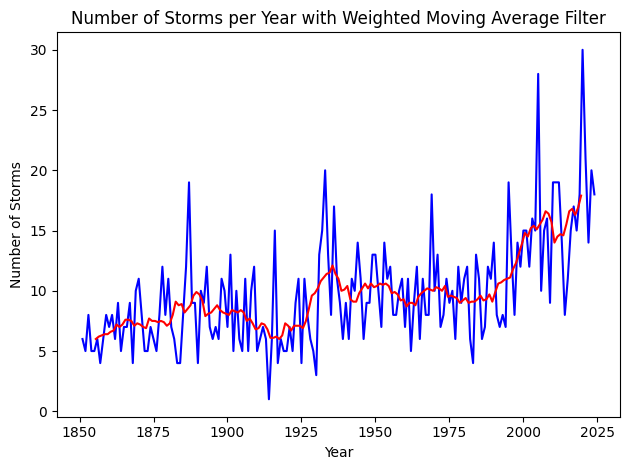

In [8]:
plot_weighted_moving_average_data(hurricane_year, storms, weight_list, 'Year', 'Number of Storms', 'Number of Storms per Year with Weighted Moving Average Filter')


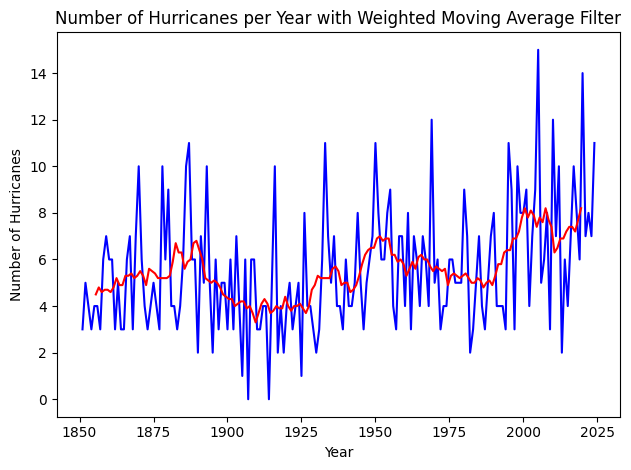

In [9]:
plot_weighted_moving_average_data(hurricane_year, hurricanes, weight_list, 'Year', 'Number of Hurricanes', 'Number of Hurricanes per Year with Weighted Moving Average Filter')

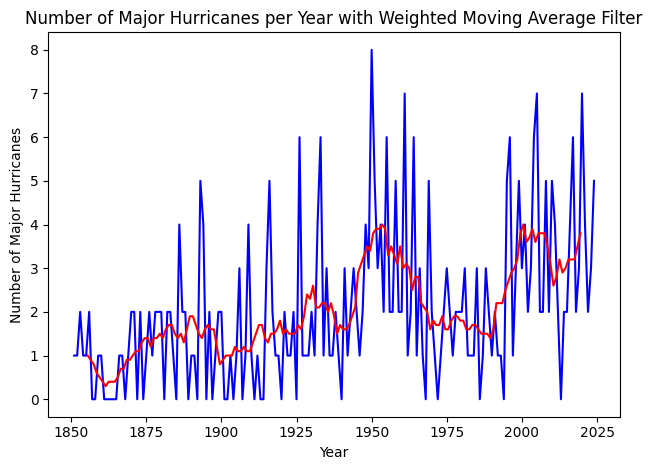

In [10]:
plot_weighted_moving_average_data(hurricane_year, major_hurricanes, weight_list, 'Year', 'Number of Major Hurricanes', 'Number of Major Hurricanes per Year with Weighted Moving Average Filter')

# Extra Stuff with Corelation Coefficients

In [11]:
new_storm = storms[130:]
new_temp_anomaly = temp_anomaly[100:]
dal.find_data_correlation(new_storm, new_temp_anomaly)

np.float64(0.6034802552187961)

There is a high corelation between the rise in global sea temperatures in recent years and the rise of storms in recent years. This kind of corelation would lead one to believe in the groundbreaking thought that global warming and it's effects do indeed exist. 